In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [45]:
## create a column matrix with X values

X = torch.linspace(1,50,50).reshape(-1,1) ## 50x1 array

X[1]

tensor([2.])

In [46]:
### create a random vector of errors

torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)

print(e.sum()) ## returns 0 as it is linearly spaces

tensor(0.)


In [47]:
## create a matrix of y values

y = 2*X + 1 + e

print(y.shape)

torch.Size([50, 1])


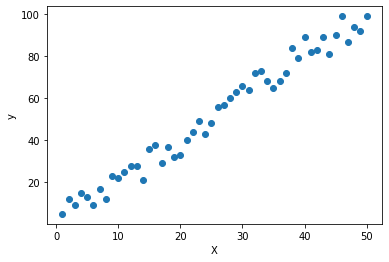

In [48]:
### plot the results

plt.scatter(X.numpy(),y.numpy())
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Simple Linear Model

In [49]:
import torch.nn as nn

torch.manual_seed(52)

model = nn.Linear(in_features=1, out_features=1) ## without seeing the data the model preselects as bias and weight

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.4325]], requires_grad=True)
Parameter containing:
tensor([0.5676], requires_grad=True)


### Building Model

In [50]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features) ## using the formula y=mx+c or y=wx+b
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [51]:
## pass in the initial parameter (1,1) to find the weight and bias after the model is instaniated.

torch.manual_seed(52)

model = Model(1,1)

print(model)
print("weight (W):",model.linear.weight.item())
print("Bias (b):",model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
weight (W): 0.43249380588531494
Bias (b): 0.5675845146179199


In [52]:
## Model Parameters (useful for large iterations)

for name, param in model.named_parameters():
    print(f'{name} \t : {param.item()}')

linear.weight 	 : 0.43249380588531494
linear.bias 	 : 0.5675845146179199


In [53]:
### testing with dummy value

x = torch.tensor([2.0])
print(model.forward(x))
print(model(x)) ## same as model.forward(x)

tensor([1.4326], grad_fn=<AddBackward0>)
tensor([1.4326], grad_fn=<AddBackward0>)


### Plotting the initial untrained model to get an idea of the starting point

In [54]:
x1 = np.array([X.min(), X.max()])
x1

array([ 1., 50.], dtype=float32)

In [55]:
w1, b1 = model.linear.weight.item(), model.linear.bias.item()

print(f"Initial Weight : {w1:.8f} and bias: {b1:.8f}")

Initial Weight : 0.43249381 and bias: 0.56758451


In [56]:
y1 = w1*x1 + b1
print("y1 : ",y1)
print("x1 : ",x1)

y1 :  [ 1.0000783 22.192276 ]
x1 :  [ 1. 50.]


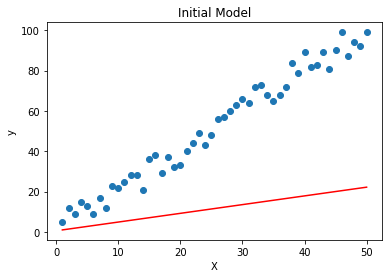

In [57]:
## plot the numbers

plt.scatter(X.numpy(),y.numpy())
plt.plot(x1,y1,'r')

plt.title("Initial Model")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Calculating Loss Function (on the actual data and plotting it)

In [58]:
### For calculating Loss function, we will be using MSE (Mean Squared Error)
### MSE is used during linear regression problems

loss_function = nn.MSELoss()

### Setting the Optimizer and Learning rate

In [59]:
### Set the optimizer (SGD - Scholastic Gradient Descent) and Learning rate as 0.001
### choice of learning rate needs to be careful

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

### Training the model

In [60]:
epochs = 50
losses = []

for i in range(epochs):
    i+=1
    
    y_predict = model.forward(X)
    calculate_loss = loss_function(y_predict, y)
    
    losses.append(calculate_loss)
    
    print(f"Epoch: {i:2} ; Loss: {calculate_loss.item():10.8f} ; Weights: {model.linear.weight.item():10.8f} ; Bias: {model.linear.bias.item():10.8f}")
    
    optimizer.zero_grad() ## gradients accumulate with every backpropagation. Need to clear before calculating
    
    calculate_loss.backward()
    
    optimizer.step()

Epoch:  1 ; Loss: 2126.31005859 ; Weights: 0.43249381 ; Bias: 0.56758451
Epoch:  2 ; Loss: 1108.09875488 ; Weights: 3.12099504 ; Bias: 0.64839214
Epoch:  3 ; Loss: 582.43218994 ; Weights: 1.18921876 ; Bias: 0.59192461
Epoch:  4 ; Loss: 311.04956055 ; Weights: 2.57718229 ; Bias: 0.63409060
Epoch:  5 ; Loss: 170.94377136 ; Weights: 1.57986152 ; Bias: 0.60538614
Epoch:  6 ; Loss: 98.61177063 ; Weights: 2.29640484 ; Bias: 0.62760246
Epoch:  7 ; Loss: 61.26878357 ; Weights: 1.78151011 ; Bias: 0.61323059
Epoch:  8 ; Loss: 41.98954010 ; Weights: 2.15142250 ; Bias: 0.62514710
Epoch:  9 ; Loss: 32.03594208 ; Weights: 1.88558769 ; Bias: 0.61817425
Epoch: 10 ; Loss: 26.89683914 ; Weights: 2.07654667 ; Bias: 0.62477291
Epoch: 11 ; Loss: 24.24330902 ; Weights: 1.93929267 ; Bias: 0.62161946
Epoch: 12 ; Loss: 22.87297058 ; Weights: 2.03786445 ; Bias: 0.62547231
Epoch: 13 ; Loss: 22.16510773 ; Weights: 1.96699202 ; Bias: 0.62429029
Epoch: 14 ; Loss: 21.79924583 ; Weights: 2.01786780 ; Bias: 0.62672514

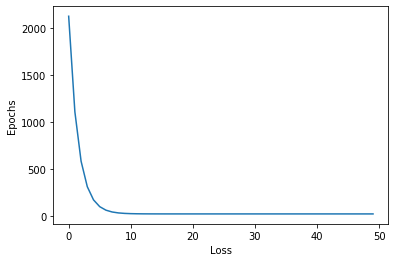

In [62]:
### plot the loss 

plt.plot(range(epochs), losses)
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.show()

### Plotting the results

In [63]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.99558020, Current bias: 0.65990984

[ 1. 50.]
[  2.65549 100.43892]


Text(0.5, 0, 'x')

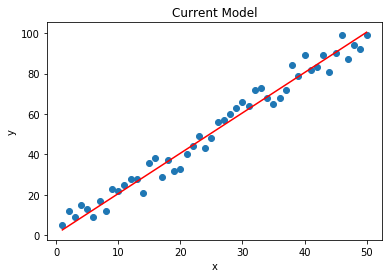

In [65]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model - Linear Model')
plt.ylabel('y')
plt.xlabel('x')